<a href="https://colab.research.google.com/github/NTKhoii/DS102.P21_Lab_2/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# THỰC HÀNH 2: CÁC PHƯƠNG PHÁP PHÂN LOẠI TUYẾN TÍNH

## Bài 1: Sử dụng Numpy xây dựng phương pháp Logistic Regression và Gradient Descent. Tiến hành huấn luyện phương pháp Logistic Regression và trực quan hoá giá trị của hàm loss trong toàn bộ quá trình huấn luyện.
Bộ dữ liệu sử dụng: Predict students’ dropout and academic success (link:
https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success). Ở bài tập này, các bạn lưu ý thực hiện bài toán phân loại 2 lớp với lớp graduate và
non-graduate (tức là xem nhãn dropout và enroll là non-graduate).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Đọc file và import thư viện

In [2]:
import pandas as pd
import numpy as np
file_path = '/content/drive/MyDrive/DS102.P21/data.csv'
df = pd.read_csv(file_path, delimiter=';')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [166]:
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

### Chuyển nhãn 'Dropout' và 'Enrolled' sang non-Graduate

In [131]:
def change_target_values(target_value):
  if target_value == 'Dropout' or  target_value == 'Enrolled':
    target_value = 'non-Graduate'
  return target_value

In [168]:
df1 = df.copy()

In [133]:
df1['Target'] = df1['Target'].apply(change_target_values) # Remove the parentheses after change_target_values

In [169]:
df1

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [170]:
df1['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [171]:
def binary_encode_target(target):
  if target == 'Graduate':
    target = 1
  else:
    target = 0
  return target

In [172]:
df1['Target'] = df1['Target'].apply(binary_encode_target)
df1

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


In [173]:
df1.dtypes

,0
Marital status,int64
Application mode,int64
Application order,int64
Course,int64
Daytime/evening attendance\t,int64
Previous qualification,int64
Previous qualification (grade),float64
Nacionality,int64
Mother's qualification,int64
Father's qualification,int64


In [174]:
df1.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,0.499322
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.500056
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,0.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,1.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,1.000000


### Tiền xử lí dữ liệu

In [175]:
def normalize_data(df, columns):
  df_normalized = df.copy()
  for column in columns:
    mean = np.mean(df[column])
    std = np.std(df[column])
    if std != 0:
      df_normalized[column] = (df[column] - mean) / std
    else:
      df_normalized[column] = df[column]
  return df_normalized

Application order là dạng catergorical nhưng có mức độ (ordinal feature) không cần chuẩn hoá vì mô hình có thể học đc

In [176]:
column = df1.columns

In [177]:
catergorical_feature = ['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance\t', 'Previous qualification',
                        'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs',
                        'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
                        'International']

In [178]:
binary_feature = []
low_categorical = []
high_catergorical = []
for feature in catergorical_feature:
  if df1[feature].unique().shape[0] == 2:
    binary_feature.append(feature)
  elif df1[feature].unique().shape[0]<=15:
    low_categorical.append(feature)
  else:
    high_catergorical.append(feature)
print(binary_feature)
print(low_categorical)
print(high_catergorical)

['Daytime/evening attendance\t', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']
['Marital status']
['Application mode', 'Course', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]


In [179]:
def check_value(df,column):
  for feature in column:
    print(f"{feature} | {df[feature].unique()}")

In [180]:
check_value(df1, high_catergorical)

Application mode | [17 15  1 39 18 53 44 51 43  7 42 16  5  2 10 57 26 27]
Course | [ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119]
Previous qualification | [ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14]
Nacionality | [  1  62   6  41  26 103  13  25  21 101  11  22  32 100  24 109   2 108
 105  14  17]
Mother's qualification | [19  1 37 38  3  4 42  2 34 12 40  9  5 39 11 41 30 14 35 36  6 10 29 43
 18 22 27 26 44]
Father's qualification | [12  3 37 38  1 19  5  4 34  2 39 11  9 36 26 40 14 20 35 41 22 13 29 43
 18 42 10  6 30 25 44 33 27 31]
Mother's occupation | [  5   3   9   7   4   1 125   0   6   2  90   8 141 175  99 191 151 194
 192 132 152 134  10 143 123 173 193 122 144 131 171 153]
Father's occupation | [  9   3   7  10   5   8   4   1   2 124   6   0  90 175 121  99 144 195
 192 161 193 151 182 132 131 194 163 135 143 171 103 172 152 183 122 102
 181 134 123 112 153 174 141 114 101 154]


#### Chuẩn hoá các thuộc tính

In [181]:
numerical_feature = ['Application order', 'Age at enrollment', 'Curricular units 1st sem (credited)',
                     'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
                     'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (credited)',
                     'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
                     'Curricular units 2nd sem (approved)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (without evaluations)']

In [182]:
columns = ['Previous qualification (grade)',
           'Admission grade',
           'Unemployment rate',
           'Inflation rate',
           'GDP']
df1 = normalize_data(df1, columns)
df1 = normalize_data(df1, numerical_feature)

In [183]:
df1 = normalize_data(df1, ['Application mode'])

In [184]:
check_value(df1, numerical_feature)

Application order | [ 2.49089589 -0.55406775  0.20717316  1.72965498  0.96841407  3.2521368
  5.53585953 -1.31530866]
Age at enrollment | [-0.43036282 -0.56216796  2.86476548  3.52379114 -0.69397309 -0.16675256
 -0.29855769  1.41490902  1.81032442  2.60115521  4.1828168   2.07393469
  0.75588336  0.0968577   0.4922731  -0.03494743  0.36046797  1.28310389
  1.54671416  0.22866284  2.73296035  1.67851929  3.12837574  0.62407823
  1.94212955  0.8876885   1.01949363  1.15129876  2.20573982  2.46935008
  3.26018087  3.39198601  2.99657061  2.33754495  6.15989378  4.84184246
  3.91920653  3.65559627  3.7874014   4.05101167  4.97364759  4.57823219
  4.71003733 -0.82577822  4.44642706  5.10545272]
Curricular units 1st sem (credited) | [-0.30081306  0.54655846  0.97024422  2.2413015   2.66498726  5.20710181
  1.39392998  0.1228727   1.81761574  7.74921637  4.35973029  3.08867302
  3.93604453  3.51235877  6.05447333  4.78341605  5.63078757  7.32553061
  6.90184485  6.47815909  8.17290213]
Curric

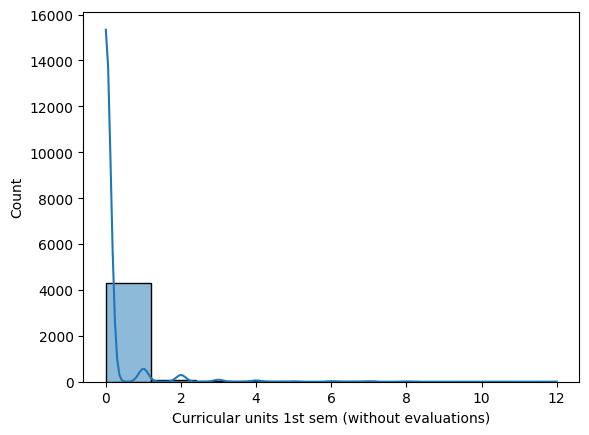

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Curricular units 1st sem (without evaluations)'], bins=10, kde=True)
plt.show()

Có thể nhóm lại các thành phần lớn hơn 2 thành 1 nhóm
Giúp mô hình ổn định hơn nếu dữ liệu có nhiễu
Nếu các giá trị lớn (>5) xuất hiện rất ít, chúng có thể gây nhiễu hoặc làm mô hình khó học hơn.

Nhóm lại giúp làm mượt dữ liệu, giảm ảnh hưởng của outliers, từ đó mô hình có thể tổng quát hóa tốt hơn.

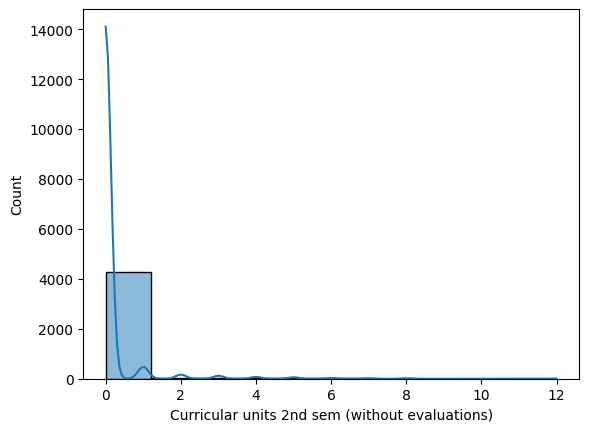

In [186]:
sns.histplot(df['Curricular units 2nd sem (without evaluations)'], bins=10, kde=True)
plt.show()

In [42]:
#encode Curricular units 2nd sem (without evaluations) and Curricular units 1nd sem (without evaluations)
# value<2: 0
# value>2: 1
def encode_units(df,features):
  df1 = df.copy()
  for feature in features:
    # Iterate over the index of the DataFrame
    for index in df1.index:
      # Access the value using .loc
      if df1.loc[index, feature]<=2:
        df1.loc[index, feature] = 1  # Update the value using .loc
      else:
        df1.loc[index, feature] = 0  # Update the value using .loc
  return df1

In [43]:
units  = ['Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (without evaluations)']
df1 = encode_units(df1, units)

Các giá trị rời rạc không được chuẩn hoá
- Tại sao không nên normalize giá trị rời rạc lớn?
- 1) Không có ý nghĩa về khoảng cách
Ví dụ: Course 33 - Biofuel Production Technologies và 9991 - Management (evening attendance) có giá trị rất xa nhau, nhưng con số này không đại diện cho một thước đo liên tục.
- 2) Normalize sẽ khiến mô hình nghĩ rằng 9991 có mối quan hệ mạnh hơn với 9254 hơn là với 33, nhưng thực tế chúng không có thứ tự nào cả.
Gây hiểu sai trong mô hình

### One hot encode cho thuộc tính Course
- Nhận thấy Course là thuộc tính rời rạc nhưng mang giá trị rất nên sẽ one hot encode cho thuộc tính này

In [187]:
def one_hot_encode(df, column):
    """
    Chuyển đổi một cột phân loại thành One-Hot Encoding sử dụng NumPy.

    Tham số:
    df (pd.DataFrame): DataFrame chứa cột cần mã hóa.
    column (str): Tên cột cần mã hóa.

    Trả về:
    pd.DataFrame: DataFrame mới với các cột One-Hot Encoding.
    """
    unique_values = np.unique(df[column])  # Lấy danh sách giá trị duy nhất
    one_hot_matrix = np.zeros((df.shape[0], len(unique_values)))  # Ma trận One-Hot

    value_to_index = {val: idx for idx, val in enumerate(unique_values)}  # Ánh xạ giá trị -> index

    for i, val in enumerate(df[column]):
        one_hot_matrix[i, value_to_index[val]] = 1  # Đánh dấu vị trí One-Hot

    one_hot_df = pd.DataFrame(one_hot_matrix, columns=[f"{column}_{val}" for val in unique_values])

    return df.drop(columns=[column]).reset_index(drop=True).join(one_hot_df)

In [188]:
df1 = one_hot_encode(df1, 'Course')

In [189]:
import pandas as pd

# Giả sử df là dataframe chứa cột Mother's qualification
mapping = {
    34: "Unknown", 35: "Unknown", 36: "Unknown",
    37: "Basic Education", 38: "Basic Education", 26: "Basic Education",
    30: "Basic Education", 29: "Basic Education", 19: "Basic Education",
    11: "Basic Education",
    1: "High School", 9: "High School", 10: "High School",
    12: "High School", 14: "High School", 27: "High School",
    18: "Vocational", 22: "Vocational", 39: "Vocational", 42: "Vocational",
    2: "Higher Education", 3: "Higher Education", 40: "Higher Education", 41: "Higher Education", 6: "Higher Education",
    4: "Postgraduate", 43: "Postgraduate", 5: "Postgraduate", 44: "Postgraduate"
}

df1["Mother's qualification"] = df1["Mother's qualification"].map(mapping)


In [190]:
mapping_father = {
    34: "Unknown", 35: "Unknown", 36: "Unknown",
    37: "Basic Education", 38: "Basic Education", 26: "Basic Education",
    30: "Basic Education", 29: "Basic Education", 19: "Basic Education",
    11: "Basic Education",
    1: "High School", 9: "High School", 10: "High School",
    12: "High School", 14: "High School", 27: "High School",
    13: "High School", 20: "High School", 25: "High School",
    18: "Vocational", 22: "Vocational", 31: "Vocational", 33: "Vocational",
    39: "Vocational", 42: "Vocational",
    2: "Higher Education", 3: "Higher Education", 40: "Higher Education", 41: "Higher Education", 6: "Higher Education",
    4: "Postgraduate", 43: "Postgraduate", 5: "Postgraduate", 44: "Postgraduate"
}

df1["Father's qualification"] = df1["Father's qualification"].map(mapping_father)


In [191]:
def ordinal_encoding_qualification(df, column):
  ordinal_mapping = {
      'Unknown': 1,
      'Basic Education': 2,
      'High School': 3,
      'Vocational': 4,
      'Higher Education': 5,
      'Postgraduate': 6
  }
  return df[column].map(ordinal_mapping)

In [192]:
df1["Mother's qualification"] = ordinal_encoding_qualification(df1, "Mother's qualification")

In [193]:
df1["Father's qualification"] = ordinal_encoding_qualification(df1, "Father's qualification")

In [194]:
occupation_groups = {
    'Education': [0, 123],
    'Management': [1, 112, 114],
    'STEM': [2, 3, 121, 122, 125, 131, 132, 135],
    'Administrative': [4, 124, 141, 143, 144],
    'Services': [5, 134, 151, 152, 153, 154, 194, 195],
    'Agriculture': [6, 192, 161, 163],
    'Construction': [7, 171, 173, 193, 172],
    'Manufacturing': [175, 194, 174],
    'Unskilled': [9, 191, 192, 193],
    'Military': [10, 101, 102, 103],
    'Other': [90, 99],
    'Operators': [8, 181, 182, 183]  # Nhóm riêng cho công nhân vận hành máy móc
}
# Ánh xạ lại giá trị
df1["Mother's occupation"] = df1["Mother's occupation"].map({code: group for group, codes in occupation_groups.items() for code in codes})

In [195]:
df1["Father's occupation"] = df1["Father's occupation"].map({code: group for group, codes in occupation_groups.items() for code in codes})

In [196]:
df1 = one_hot_encode(df1, "Mother's occupation")
df1 = one_hot_encode(df1, "Father's occupation")

In [197]:
df1.drop(columns=["Nacionality"], inplace=True)
df1.drop(columns=["International"], inplace=True)

In [198]:
df1.describe()

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Admission grade,Displaced,...,Father's occupation_Construction,Father's occupation_Education,Father's occupation_Management,Father's occupation_Manufacturing,Father's occupation_Military,Father's occupation_Operators,Father's occupation_Other,Father's occupation_STEM,Father's occupation_Services,Father's occupation_Unskilled
count,4424.000000,4.424000e+03,4.424000e+03,4424.000000,4424.000000,4.424000e+03,4424.000000,4424.000000,4.424000e+03,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,-7.066881e-17,-1.108215e-16,0.890823,4.577758,-3.710112e-16,2.663879,2.499096,-9.692869e-16,0.548373,...,0.152803,0.029611,0.030967,0.001582,0.061709,0.073689,0.018987,0.133137,0.118671,0.233047
std,0.605747,1.000113e+00,1.000113e+00,0.311897,10.216592,1.000113e+00,1.107717,0.983701,1.000113e+00,0.497711,...,0.359838,0.169531,0.173249,0.039751,0.240653,0.261294,0.136496,0.339762,0.323437,0.422820
min,1.000000,-1.010660e+00,-1.315309e+00,0.000000,1.000000,-2.852337e+00,1.000000,1.000000,-2.208378e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-1.010660e+00,-5.540678e-01,1.000000,1.000000,-5.773417e-01,2.000000,2.000000,-6.269262e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,-9.547022e-02,-5.540678e-01,1.000000,1.000000,3.690696e-02,2.000000,2.000000,-6.064208e-02,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.162916e+00,2.071732e-01,1.000000,1.000000,5.601559e-01,3.000000,3.000000,5.401715e-01,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,2.192505e+00,5.535860e+00,1.000000,43.000000,4.351815e+00,6.000000,6.000000,4.352230e+00,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


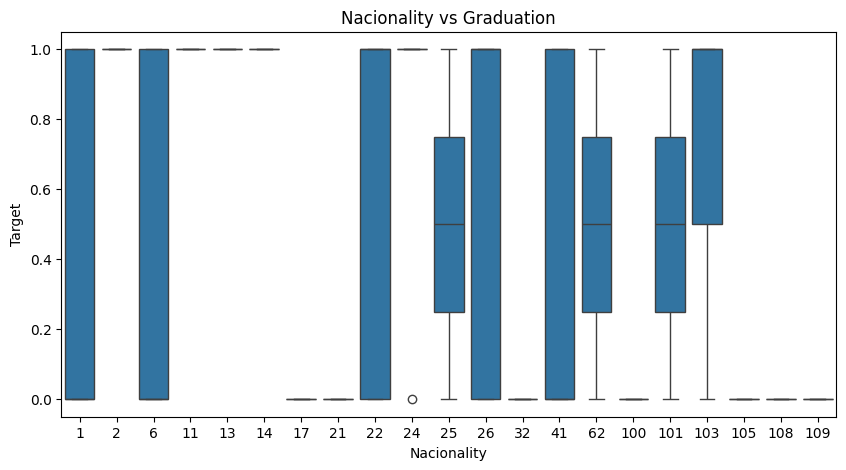

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x=df1["Nacionality"], y=df1["Target"])
plt.title("Nacionality vs Graduation")
plt.show()


### Tách tập train và tập test

In [199]:
y = df1['Target'].to_numpy()
df1 = df1.drop(columns=['Target'])

In [200]:
Matrix = df1.to_numpy()
Matrix, Matrix.shape

(array([[ 1.        , -0.09547022,  2.49089589, ...,  0.        ,
          0.        ,  1.        ],
        [ 1.        , -0.20986898, -0.55406775, ...,  1.        ,
          0.        ,  0.        ],
        [ 1.        , -1.01066035,  2.49089589, ...,  0.        ,
          0.        ,  1.        ],
        ...,
        [ 1.        , -1.01066035, -0.55406775, ...,  0.        ,
          0.        ,  1.        ],
        [ 1.        , -1.01066035, -0.55406775, ...,  0.        ,
          0.        ,  0.        ],
        [ 1.        , -0.4958659 , -0.55406775, ...,  0.        ,
          0.        ,  1.        ]]),
 (4424, 72))

In [201]:
size = int(0.8*Matrix.shape[0])
X_train, X_test = Matrix[:size], Matrix[size:]
y_train, y_test = y[:size], y[size:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3539, 72) (885, 72) (3539,) (885,)


### Xây dựng lớp và huấn luyện mô hình

In [202]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        z = np.clip(z, -500, 500)  # Tránh tràn số
        return 1 / (1 + np.exp(-z))

    def loss_fn(self, y, y_predicted):
        return -np.mean(y * np.log(y_predicted + 1e-9) + (1 - y) * np.log(1 - y_predicted + 1e-9))


    def compute_accuracy(self, y, y_predicted):
        y_pred_labels = (y_predicted >= 0.5).astype(int)
        return np.mean(y_pred_labels == y)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Compute loss and accuracy
            loss = self.loss_fn(y, y_predicted)
            accuracy = self.compute_accuracy(y, y_predicted) # Moved the assignment of accuracy before the print statement

            if _ % 100 == 0:
                print(f"Epoch {_}: Loss = {loss:.4f}, Accuracy = {accuracy:.4f}")

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X):
        y_predicted_proba = self.predict_proba(X)
        return (y_predicted_proba >= 0.5).astype(int)

In [203]:
modelV0 = LogisticRegression()

In [204]:
modelV0.fit(X_train, y_train)

Epoch 0: Loss = 0.6931, Accuracy = 0.5044
Epoch 100: Loss = 0.5343, Accuracy = 0.7389
Epoch 200: Loss = 0.4948, Accuracy = 0.7782
Epoch 300: Loss = 0.4718, Accuracy = 0.7926
Epoch 400: Loss = 0.4558, Accuracy = 0.8070
Epoch 500: Loss = 0.4436, Accuracy = 0.8107
Epoch 600: Loss = 0.4339, Accuracy = 0.8160
Epoch 700: Loss = 0.4258, Accuracy = 0.8189
Epoch 800: Loss = 0.4189, Accuracy = 0.8231
Epoch 900: Loss = 0.4129, Accuracy = 0.8262


In [205]:
y_preds = modelV0.predict(X_test)
print(f"Loss: {modelV0.loss_fn(y_test, y_preds)} | Accuracy: {modelV0.compute_accuracy(y_test, y_preds)}")


Loss: 3.606082415998585 | Accuracy: 0.8259887005649718


In [206]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       461
           1       0.78      0.88      0.83       424

    accuracy                           0.83       885
   macro avg       0.83      0.83      0.83       885
weighted avg       0.83      0.83      0.83       885



## Bài 3.1: Sử dụng các thư viện Machine Learning (Sklearn hoặc Skorch) thực thi lại phương pháp Logistic Regression

In [207]:
df1

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Admission grade,Displaced,...,Father's occupation_Construction,Father's occupation_Education,Father's occupation_Management,Father's occupation_Manufacturing,Father's occupation_Military,Father's occupation_Operators,Father's occupation_Other,Father's occupation_STEM,Father's occupation_Services,Father's occupation_Unskilled
0,1,-0.095470,2.490896,1,1,-0.804841,2,3,0.022229,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,-0.209869,-0.554068,1,1,2.076819,3,5,1.071926,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,-1.010660,2.490896,1,1,-0.804841,2,2,-0.150419,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,-0.095470,0.207173,1,1,-0.804841,2,2,-0.509526,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,1.162916,-0.554068,0,1,-2.473171,2,2,1.002867,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,-1.010660,3.252137,1,1,-0.577342,3,3,-0.329972,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4420,1,-1.010660,0.207173,1,1,-0.956508,3,3,-0.550961,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4421,1,-1.010660,-0.554068,1,1,1.621820,2,2,1.555339,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4422,1,-1.010660,-0.554068,1,1,3.593483,2,2,1.852293,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [208]:
X = df1.to_numpy()

In [209]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [217]:
# import the class
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=16, max_iter=1000, solver='sag')

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [218]:
from sklearn.metrics import log_loss
loss = log_loss(y_test, y_pred)

In [219]:
print(f"Log Loss: {loss:.4f}")

Log Loss: 5.5796


In [220]:
from sklearn.metrics import accuracy_score
# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2%}")

Accuracy: 84.52%


In [221]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       467
           1       0.80      0.89      0.84       418

    accuracy                           0.85       885
   macro avg       0.85      0.85      0.85       885
weighted avg       0.85      0.85      0.85       885



## Bài 2: Sử dụng Numpy xây dựng phương pháp Softmax Regression và Gradient Descent. Tiến hành huấn luyện phương pháp Logistic Regression và trực quan hoá giá trị của hàm loss trong toàn bộ quá trình huấn luyện.
Bộ dữ liệu sử dụng: Predict students’ dropout and academic success. Ở bài tập này, các
bạn lưu ý thực hiện bài toán phân loại 3 lớp với lớp graduate, dropout và enroll.

In [224]:
df2 = df.copy()

In [225]:
df2['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [228]:
class labelEncoder:
  def __init__(self):
    self.class_to_index = {} # mapping từ nhãn -> số
    self.index_to_class = {} # mapping từ số -> nhãn

  def fit(self, y):
    # Học danh sách nhãn duy nhất và tạo ánh xạ
    unique_classes = np.unique(y)
    self.class_to_index = {cls: idx for idx, cls in enumerate(unique_classes)}
    self.index_to_class = {idx: cls for idx, cls in enumerate(unique_classes)}

  def transform(self, y):
    # Chuyển danh sáhc nhãn thành số
    return np.array([self.class_to_index[cls] for cls in y])

  def fit_transform(self, y):
    #kết hợp cả fit và transform
    self.fit(y)
    return self.transform(y)

  def inverse_transform(self, y_encoded):
    # chuyển số về nhãn
    return np.array([self.index_to_class[idx] for idx in y_encoded])

In [226]:
Matrix = df2.to_numpy()
y = Matrix[:, -1]

In [236]:
label_encoder = labelEncoder()
y = label_encoder.fit_transform(y)

In [230]:
df2 = df1.copy()

In [237]:
Matrix = df2.to_numpy()
size = int(0.8*Matrix.shape[0])
X_train, X_test = Matrix[:size], Matrix[size:]
y_train, y_test = y[:size], y[size:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3539, 72) (885, 72) (3539,) (885,)


In [272]:
import numpy as np

class SoftmaxRegression:
    def __init__(self, learning_rate=0.03, epochs=1000, reg_lambda=0.0):
        self.learning_rate = learning_rate  # Tốc độ học
        self.epochs = epochs  # Số vòng lặp huấn luyện
        self.reg_lambda = reg_lambda  # Tham số điều chuẩn (regularization)
        self.W = None  # Trọng số
        self.b = None  # Hệ số chặn (bias)
    def softmax(self, Z):
        exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))  # Tránh overflow
        return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

    def accuracy(self, X, y_true):
        """Tính accuracy của mô hình trên tập dữ liệu."""
        y_pred = self.predict(X)  # Dự đoán nhãn
        acc = np.mean(y_pred == y_true)  # Tính phần trăm dự đoán đúng
        return acc

    def compute_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        # Ensure y_pred is probabilities, not class labels
        if y_pred.ndim == 1:  # If y_pred is 1D (class labels)
            y_pred_probs = self.softmax(np.dot(X_test, self.W) + self.b)  # Calculate probabilities
            log_probs = -np.log(y_pred_probs[range(m), y_true])
        else:  # If y_pred is 2D (probabilities)
            log_probs = -np.log(y_pred[range(m), y_true])  # Lấy log của xác suất đúng
        loss = np.sum(log_probs) / m
        return loss
    def compute_gradients(self, X, y_true, y_pred):
        m = X.shape[0]
        y_one_hot = np.zeros_like(y_pred)
        y_one_hot[np.arange(m), y_true] = 1  # Chuyển nhãn thành one-hot

        dW = (1/m) * np.dot(X.T, (y_pred - y_one_hot)) + self.reg_lambda * self.W
        db = (1/m) * np.sum(y_pred - y_one_hot, axis=0)

        return dW, db
    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        # Khởi tạo tham số
        self.W = np.random.randn(n_features, n_classes) * 0.01
        self.b = np.zeros((1, n_classes))

        for epoch in range(self.epochs):
            # Tính toán đầu ra
            Z = np.dot(X, self.W) + self.b
            y_pred = self.softmax(Z)

            # Tính toán mất mát
            loss = self.compute_loss(y, y_pred)
            Accuracy = self.accuracy(X, y)

            # Cập nhật trọng số
            dW, db = self.compute_gradients(X, y, y_pred)
            self.W -= self.learning_rate * dW
            self.b -= self.learning_rate * db

            # Hiển thị loss mỗi 100 epochs
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}, Acc: {Accuracy:.4f}")
    def predict(self, X):
        Z = np.dot(X, self.W) + self.b
        y_pred = self.softmax(Z)
        return np.argmax(y_pred, axis=1)  # Trả về chỉ số lớp có xác suất cao nhất

In [273]:
model_V1 = SoftmaxRegression()

In [274]:
model_V1.fit(X_train, y_train)

Epoch 0, Loss: 1.1243, Acc: 0.2614
Epoch 100, Loss: 0.8946, Acc: 0.5439
Epoch 200, Loss: 0.7551, Acc: 0.6906
Epoch 300, Loss: 0.6846, Acc: 0.7253
Epoch 400, Loss: 0.6469, Acc: 0.7446
Epoch 500, Loss: 0.6236, Acc: 0.7567
Epoch 600, Loss: 0.6076, Acc: 0.7601
Epoch 700, Loss: 0.5957, Acc: 0.7632
Epoch 800, Loss: 0.5865, Acc: 0.7674
Epoch 900, Loss: 0.5793, Acc: 0.7731


In [275]:
y_pred = model_V1.predict(X_test)

In [277]:
print(f"Loss: {model_V1.compute_loss(y_test, y_pred):.4f}, Accuracy: {model_V1.accuracy(X_test, y_test):.4f}")

Loss: 0.6087, Accuracy: 0.7435


## Bài 3: Sử dụng các thư viện Machine Learning (Sklearn hoặc Skorch) thực thi lại 02 phương pháp Logistic Regression và Softmax Regression.

In [280]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


X_train, X_temp, y_train, y_temp = train_test_split(Matrix, y, test_size=0.2, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


softmax_model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
softmax_model.fit(X_train, y_train)

# 🟢 Bước 6: Dự đoán
y_train_pred = softmax_model.predict(X_train)
y_dev_pred = softmax_model.predict(X_dev)
y_test_pred = softmax_model.predict(X_test)

# 🟢 Bước 7: Đánh giá mô hình
train_acc = accuracy_score(y_train, y_train_pred)
dev_acc = accuracy_score(y_dev, y_dev_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Dev Accuracy: {dev_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Báo cáo chi tiết (Precision, Recall, F1-score)
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Train Accuracy: 0.7977
Dev Accuracy: 0.7602
Test Accuracy: 0.7540

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       155
           1       0.54      0.33      0.41        83
           2       0.76      0.91      0.83       205

    accuracy                           0.75       443
   macro avg       0.70      0.67      0.68       443
weighted avg       0.74      0.75      0.74       443

